    面积     价格
0   56   7800
1  104   9000
2  156   9200
3  200  10000
4  250  11000
5  300  12000
[[170]]
回归系数:  [[16.32229076]]
截距:  [6933.4063421]
预测值:  [[9708.19577086]]


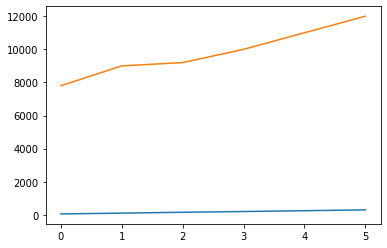

In [8]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = [[56, 7800], [104, 9000], [156, 9200], [200, 10000], [250, 11000], [300, 12000]]
columns = ['面积', '价格']
df = pd.DataFrame(data = data, columns = columns)
x = pd.DataFrame(df['面积'])
y = pd.DataFrame(df['价格'])
print(df)
clf = linear_model.LinearRegression()
clf.fit(x, y)     # 拟合线性模型
k = clf.coef_     # 回归系数
b = clf.intercept_ # 截距
x0 = np.array([[170]])
print(x0)
# 通过给定的x0预测y0，y0=截距+x值*回归系数
y0 = clf.predict(x0)
print('回归系数: ', k)
print('截距: ', b)
print('预测值: ', y0)
plt.plot(df)
# plt.plot(x0, y0)
plt.show()

In [14]:
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
data = [[56, 7800], [104, 9000], [156, 9200], [200, 10000], [250, 11000], [300, 12000]]
columns = ['面积', '价格']
df = pd.DataFrame(data = data, columns = columns)
print(df)
x = pd.DataFrame(df['面积'])
y = pd.DataFrame(df['价格'])
clf = Ridge(alpha = 1.0)
clf.fit(x, y)
k = clf.coef_
b = clf.intercept_
x0 = np.array([[170]])
y0 = clf.predict(x0)
print(k)
print(b)
print(y0)

    面积     价格
0   56   7800
1  104   9000
2  156   9200
3  200  10000
4  250  11000
5  300  12000
[[16.32189646]]
[6933.47639485]
[[9708.19879377]]


In [21]:
# 支持向量机
from sklearn.svm import LinearSVR
from sklearn.datasets import load_boston
from pandas import DataFrame
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
# print(df)
df.insert(0, 'target', boston.target)
# print(df)
data_mean = df.mean()   # 获取平均值
data_std = df.std()     # 获取标准偏差
data_train = (df - data_mean) / data_std   # 数据标准化
x_train = data_train[boston.feature_names].values  # 特征数据
y_train = data_train['target'].values              # 目标数据
linearsvr = LinearSVR(C = 0.1)        # 创建LinearSVR对象
linearsvr.fit(x_train, y_train)
# 预测 并还原结果
x = ((df[boston.feature_names] - data_mean[boston.feature_names]) / data_std[boston.feature_names]).values
# 添加预测房价的信息列
df[u'y_pred'] = linearsvr.predict(x) * data_std['target'] + data_mean['target']
print(df[['target', 'y_pred']].head())

   target     y_pred
0    24.0  28.388480
1    21.6  23.848656
2    34.7  29.922261
3    33.4  28.299407
4    36.2  28.114734


In [22]:
# 聚类
import numpy as np
from sklearn.cluster import KMeans
X = np.array([[1, 10], [1, 11], [1, 12], [3, 20], [3, 23], [3, 21], [3, 25]])
kmodel = KMeans(n_clusters = 2)   # 调用KMeans方法实现聚类
y_pred = kmodel.fit_predict(X)    # 预测类别
print('预测类别: ', y_pred)
print('聚类中心坐标值: ', '\n', kmodel.cluster_centers_)
print('类别标记: ', kmodel.labels_)

预测类别:  [1 1 1 0 0 0 0]
聚类中心坐标值:  
 [[ 3.   22.25]
 [ 1.   11.  ]]
类别标记:  [1 1 1 0 0 0 0]


In [27]:
# 生成用于聚类的测试数据
from sklearn.datasets import make_blobs
from matplotlib import pyplot
x, y = make_blobs(n_samples = 500, n_features=2, centers=3)


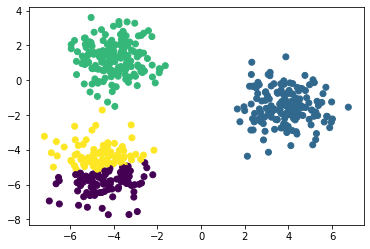

In [28]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c = y_pred)
plt.show()